# Backfield processing
- Primarily to obtain Bcr -- coercivity of remanence values

In [1]:
import pmagpy.rockmag as rmag

import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag
import pmagpy.contribution_builder as cb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Import data


In [2]:
# define the path to the folder 
dir_path = '../example_data/SSRM2024C'
# download the data from the MagIC database using my private contribution key 
result, magic_file = ipmag.download_magic_from_id('20133', directory=dir_path, share_key='3b58527f-872b-4e64-a0f1-1e57120c9f15')
# unpack the MagIC file
ipmag.unpack_magic(magic_file, dir_path, print_progress=False)
# get the contribution object
contribution = cb.Contribution(dir_path)
# get the measurements table
measurements = contribution.tables['measurements'].df
measurements = measurements.dropna(axis=1, how='all')
specimens = contribution.tables['specimens'].df

Download successful. File saved to: ../example_data/SSRM2024C/magic_contribution_20133.txt
1  records written to file  /Users/yimingzhang/Github/RockmagPy-notebooks/example_data/SSRM2024C/contribution.txt
1  records written to file  /Users/yimingzhang/Github/RockmagPy-notebooks/example_data/SSRM2024C/locations.txt
16  records written to file  /Users/yimingzhang/Github/RockmagPy-notebooks/example_data/SSRM2024C/sites.txt
28  records written to file  /Users/yimingzhang/Github/RockmagPy-notebooks/example_data/SSRM2024C/samples.txt
50  records written to file  /Users/yimingzhang/Github/RockmagPy-notebooks/example_data/SSRM2024C/specimens.txt
16966  records written to file  /Users/yimingzhang/Github/RockmagPy-notebooks/example_data/SSRM2024C/measurements.txt
-I- Using online data model
-I- Getting method codes from earthref.org
-I- Importing controlled vocabularies from https://earthref.org


## select specimen backfield experiment data

In [3]:
# filter for the backfield data
backfield_data = measurements[measurements['method_codes'] == 'LP-BCR-BF']

In [4]:
# investigate the specimens that have backfield data
backfield_data['specimen'].unique()

array(['MA1-5-r gelcap', 'MA1-OX-r', 'SJ1-4-r gelcap', 'SJ5-5-r gelcap',
       'WS3-1-r'], dtype=object)

In [5]:
# select the specimen
specimen = 'SJ1-4-r gelcap'
specimen_data = backfield_data[backfield_data['specimen'] == specimen]

# investigate the available backfield experiments, sometimes multiple experiments are done on the same specimen
specimen_data['experiment'].unique()

array(['IRM-VSM4-LP-BCR-BF-239364'], dtype=object)

In [6]:
selected_experiment = specimen_data[specimen_data['experiment'] == 'IRM-VSM4-LP-BCR-BF-239364'].reset_index()

## process backfield data

In [7]:
selected_experiment, Bcr = rmag.backfield_data_processing(selected_experiment)

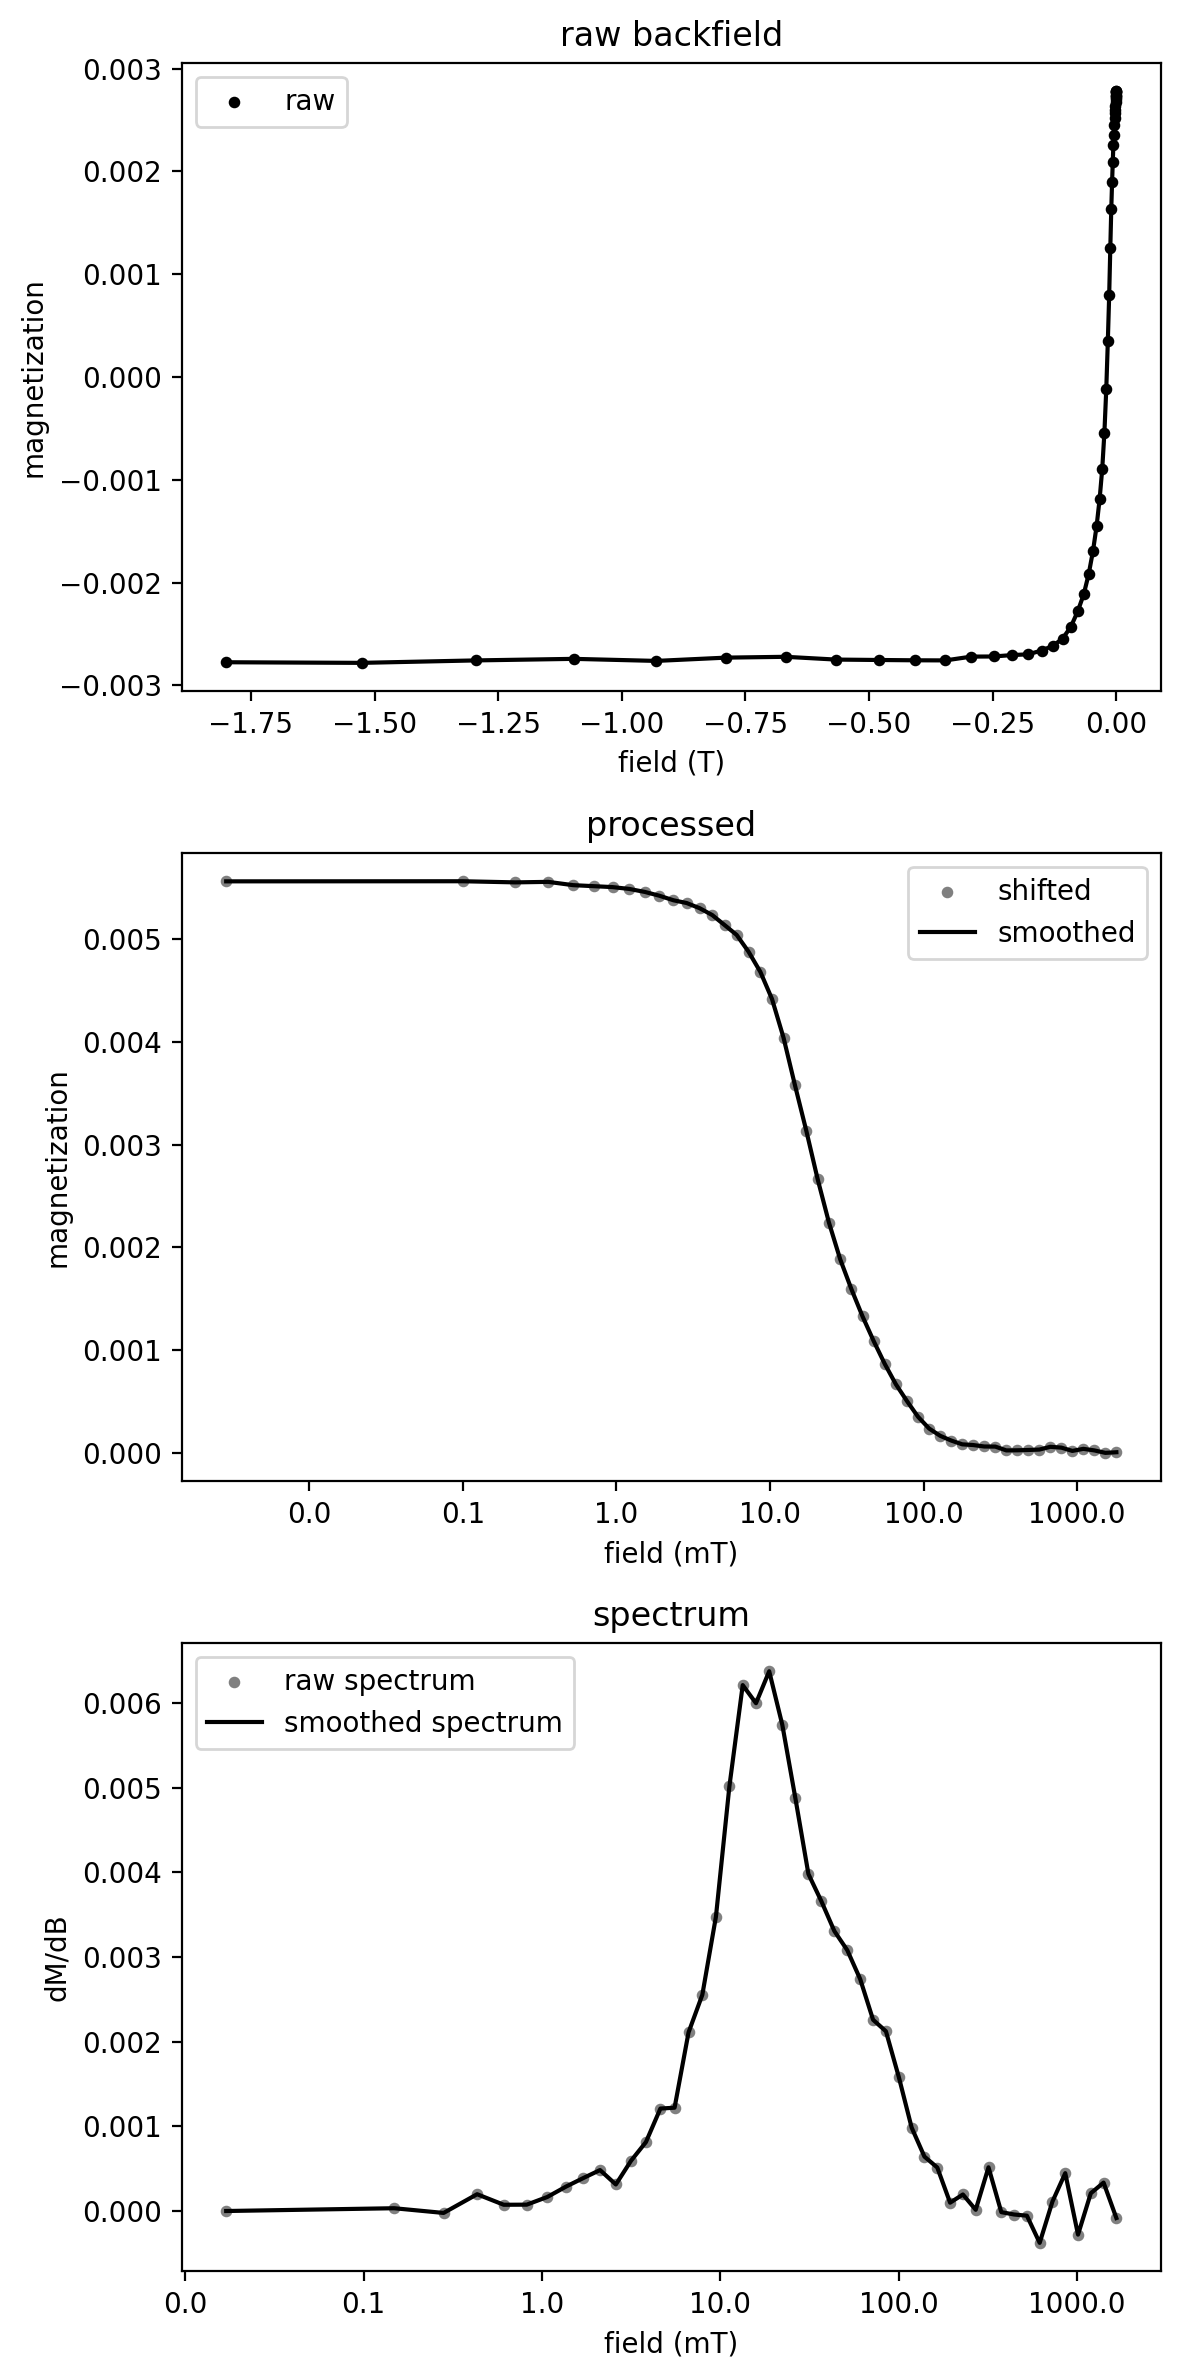

In [8]:
fig, (ax1, ax2, ax3) = rmag.plot_backfield_data(selected_experiment, figsize=(6, 12))

## add the calculated Bcr values to the specimens data table

In [10]:
rmag.add_Bcr_to_specimens_table(specimens, 'IRM-VSM4-LP-BCR-BF-239364', Bcr)
specimens

,azimuth,description,dip,experiments,hyst_bc,hyst_bc_offset,hyst_bcr,hyst_mr_mass,hyst_ms_mass,hyst_xhf,...,rem_hirm_mass,rem_sratio,rem_sratio_back,rem_sratio_forward,result_quality,sample,specimen,volume,weight,rem_bcr
specimen name,,,,,,,,,,,,,,,,,,,,,
HH8-1-r,181.3,Haliburton Highlands 8-1 VSM specimen,43.0,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,g,HH8-3,HH8-1-r,0.000001,0.000072,NaN
HH8-1x,181.3,Haliburton Highlands 8-1 X-T specimen,43.0,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,g,HH8-3,HH8-1x,0.000001,0.000181,NaN
HH8-3b,181.3,Haliburton Highlands 8-3 core,43.0,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,g,HH8-3,HH8-3b,0.000000,0.000000,NaN
MA1-1b,211.7,MA1-1 core,56.0,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,g,MA1-1,MA1-1b,0.000000,0.015202,NaN
MA1-2-r,222.7,MA1-2 VSM specimen,56.0,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,g,MA1-2,MA1-2-r,0.000001,0.000081,NaN
MA1-2b,222.7,MA1-2 core,56.0,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,g,MA1-2,MA1-2b,0.000000,0.015471,NaN
MA1-2x,222.7,MA1-2 X-T specimen,56.0,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,g,MA1-2,MA1-2x,0.000001,0.000146,NaN
MA1-3b,215.7,MA1-3 core,49.0,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,g,MA1-3,MA1-3b,0.000000,0.015741,NaN
MA1-5-r gelcap,NaN,gel cap for MPMS,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,g,MA1-5-r,MA1-5-r gelcap,0.000000,0.000090,NaN


## overwrite the specimens data table

In [ ]:
pmag.magic_write(dir_path + '/specimens.txt', specimens, 'specimens', dataframe=True)

# export MagIC upload files

In [ ]:
# ipmag.upload_magic(dir_path=dir_path,input_dir_path=dir_path, verbose=False)